# Data Structure Overview

## The `my_spectra` Array

The `my_spectra` array contains all the spectra loaded from the file.

### Array Structure
Each element in the array follows this format:
```
[mzs, intensities, coordinates]
```

### Component Descriptions

- **`mzs`**: An array of recorded m/z values for that pixel
- **`intensities`**: An array of recorded intensities corresponding to the m/z values for that pixel  
- **`coordinates`**: A tuple in the form `(x, y, z)` where `z=1` for all pixels

### Key Points
- Each spectrum corresponds to a specific spatial location
- The x,y coordinates allow mapping spectra to their physical positions

In [1]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('Cancer.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

print(f"Total spectra loaded: {len(my_spectra)}")

    

Total spectra loaded: 160000


In [2]:
import numpy as np
import random

# To show that different pixels have different number of recorded mz values
for spectrum in my_spectra[0::10]:
    print(f'Pixel {spectrum[2][:2]} has recorded mzs',len(spectrum[0]))

Pixel (0, 1) has recorded mzs 43
Pixel (10, 1) has recorded mzs 194
Pixel (20, 1) has recorded mzs 1685
Pixel (30, 1) has recorded mzs 1507
Pixel (40, 1) has recorded mzs 117
Pixel (50, 1) has recorded mzs 448
Pixel (60, 1) has recorded mzs 384
Pixel (70, 1) has recorded mzs 113
Pixel (80, 1) has recorded mzs 188
Pixel (90, 1) has recorded mzs 440
Pixel (100, 1) has recorded mzs 113
Pixel (110, 1) has recorded mzs 120
Pixel (120, 1) has recorded mzs 1536
Pixel (130, 1) has recorded mzs 209
Pixel (140, 1) has recorded mzs 1093
Pixel (150, 1) has recorded mzs 595
Pixel (160, 1) has recorded mzs 735
Pixel (170, 1) has recorded mzs 220
Pixel (180, 1) has recorded mzs 91
Pixel (190, 1) has recorded mzs 186
Pixel (200, 1) has recorded mzs 173
Pixel (210, 1) has recorded mzs 746
Pixel (220, 1) has recorded mzs 929
Pixel (230, 1) has recorded mzs 78
Pixel (240, 1) has recorded mzs 417
Pixel (250, 1) has recorded mzs 1219
Pixel (260, 1) has recorded mzs 89
Pixel (270, 1) has recorded mzs 222
Pi

**1. The above cell show that there are only 2 relevant coordinates (x,y) since z=1 for each spectrum**

**From this we can conclude that each spectrum can be plotted on a cartesian plane**

**2. We can see that we always have the same number of intensities as m/z ratios**

**With this array, we can plot the 2D graph of intensities vs m/z for a single pixel point**



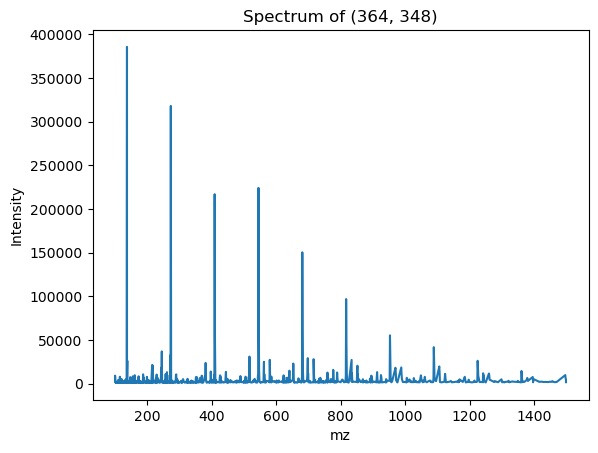

In [12]:
import matplotlib.pyplot as plt

spectrumx = my_spectra[random.randint(0,len(my_spectra)-1)]
plt.plot(spectrumx[0],spectrumx[1])
title = "Spectrum of " + str(spectrumx[2][:2])
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()


Points found 141927


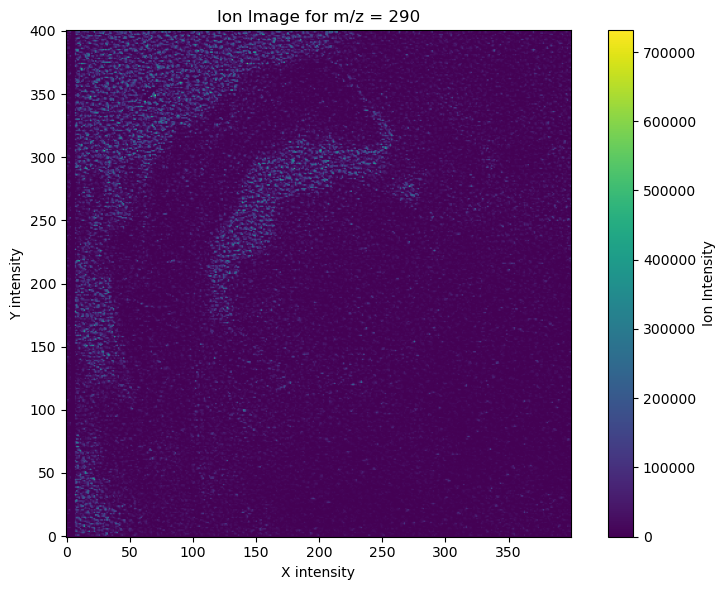

In [14]:

# Choose the m/z you want to plot  and tolerance
target_mz = 290
tolerance = 0.1

# Get image dimensions
all_coords = [coord for _, _, coord in my_spectra]
xs, ys, _ = zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()